# **Importing libraries**

In [1]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Load The Data**

In [2]:
data =pd.read_csv('/content/spam.csv' , encoding='latin1')
#encoding='latin1': Specifies the character encoding used in the file.The "latin1" encoding is often used when
#the dataset contains special characters not handled by the default encoding (utf-8).

In [3]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **Data Cleaning**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
#Drop the Columns
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [6]:
 # Rename the columns name
data.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [7]:
# Group by 'v1' column and count the occurrences
counts = data['target'].value_counts()

# Display the counts
print(counts)

target
ham     4825
spam     747
Name: count, dtype: int64


In [8]:
#Convert the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

In [9]:
data.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.isnull().sum()

,0
target,0
text,0


In [11]:
#check duplicate values
data.duplicated().sum()

403

In [12]:
#remove Duplicate
data = data.drop_duplicates(keep = 'first')


In [13]:
data.shape

(5169, 2)

# **EDA**

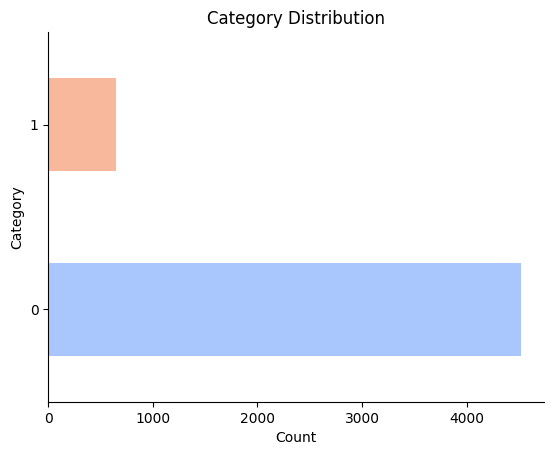

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

# Group data by 'target' and plot
data.groupby('target').size().plot(
    kind='barh',
    color=sns.color_palette('coolwarm', n_colors=2)  # Apply 'coolwarm' palette with 2 colors
)

# Remove top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Category Distribution')

# Display the plot
plt.show()


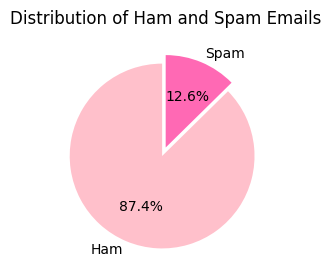

In [15]:
from matplotlib import pyplot as plt

# Count ham and spam emails
counts = data['target'].value_counts()

# Define labels and colors
labels = ['Ham', 'Spam']
colors = ['#FFC0CB', '#FF69B4']  # Light pink for Ham, Hot pink for Spam

# Create the pie chart
plt.figure(figsize=(3, 3))
plt.pie(
    counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Display percentages
    startangle=90,      # Rotate the pie chart
    explode=(0.1, 0)    # Slightly "explode" the first slice (Ham)
)

# Add a title
plt.title('Distribution of Ham and Spam Emails')

# Show the chart
plt.show()


# **Text Preprocessing**

In [19]:
import re  # Import the regular expression library for text cleaning
from nltk.stem import WordNetLemmatizer  # Import the WordNetLemmatizer for lemmatization

# Assuming 'data' is your DataFrame with 'text' (emails/messages) and 'target' (labels: 'ham' or 'spam')
X, y = data.text, data.target  # Assign the text data to X and target labels to y

# Initialize the lemmatizer that will be used to reduce words to their base forms
lemmatizer = WordNetLemmatizer()

# List to store the cleaned and lemmatized text data
documents = []

# Reset index to ensure that the index of X is sequential (useful if it has non-sequential indices)
X = X.reset_index(drop=True)

# Loop through each sentence (row) in the text data X
for sen in range(0, len(X)):
    # Clean the text data by removing all non-alphanumeric characters (keeping spaces)
    document = re.sub(r'\W', ' ', str(X.iloc[sen]))  # 'iloc[sen]' accesses the sentence at index 'sen'

    # Remove single characters that are surrounded by spaces (e.g., 'a', 'I', etc.)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start of the sentence
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substitute multiple consecutive spaces with a single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Remove any leading 'b' (this might be needed for specific cases like 'b I am happy' -> 'I am happy')
    document = re.sub(r'^b\s+', '', document)

    # Convert all characters in the text to lowercase for uniformity
    document = document.lower()

    # Split the cleaned document into words (tokens)
    document = document.split()

    # Lemmatize each word in the document to its base form (e.g., 'running' -> 'run')
    document = [lemmatizer.lemmatize(word) for word in document]

    # Join the lemmatized words back into a single string
    document = ' '.join(document)

    # Append the cleaned and lemmatized document to the list
    documents.append(document)

# Now `documents` contains the processed text, ready for further use (e.g., training a classifier)


In [26]:
#text after Preprocessing
documents[1]

'ok lar joking wif oni'

In [24]:
#text before Preprocessing
X[1]

'Ok lar... Joking wif u oni...'

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[884   1]
 [ 19 130]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034

0.9806576402321083


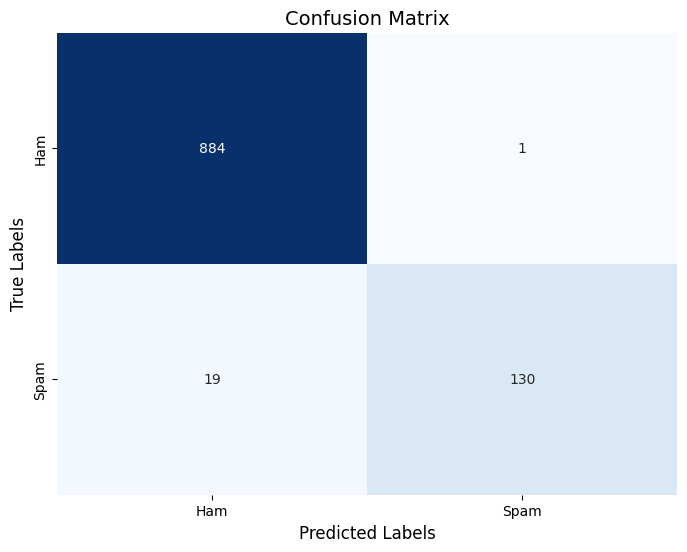

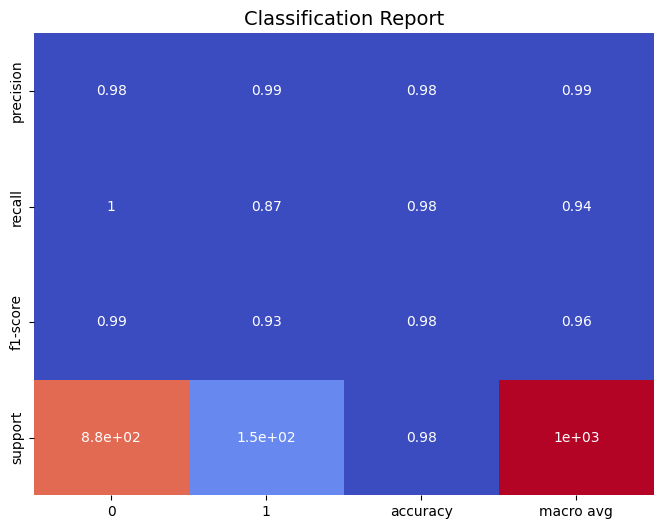

In [34]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])

# Add labels, title, and adjust the font size
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Visualizing the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a pandas DataFrame
import pandas as pd
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm', cbar=False)
plt.title('Classification Report', fontsize=14)
plt.show()
